In [212]:
# Importing Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [211]:
# loading dataset
df=pd.read_csv('SampleSuperstore.csv')

In [213]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [6]:
df.shape

(9994, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

   There is no null values

In [9]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [94]:
top_states=df.groupby('State').sum().reset_index().sort_values('Profit',ascending=False)


In [42]:
top10_states=top_states[:10].loc[:,('State','Profit')]

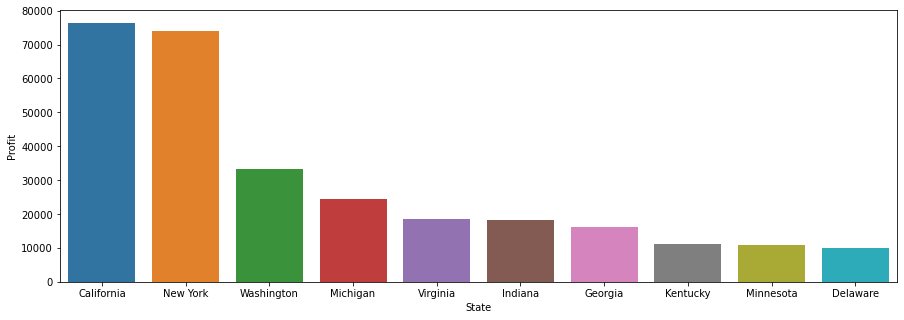

In [45]:
plt.figure(figsize=(15,5))
sns.barplot(data=top10_states,x='State',y='Profit')
plt.show()


## Top 10 profitable states ^

In [56]:
last10_states=top_states[-10:].sort_values("Profit",ascending=False)

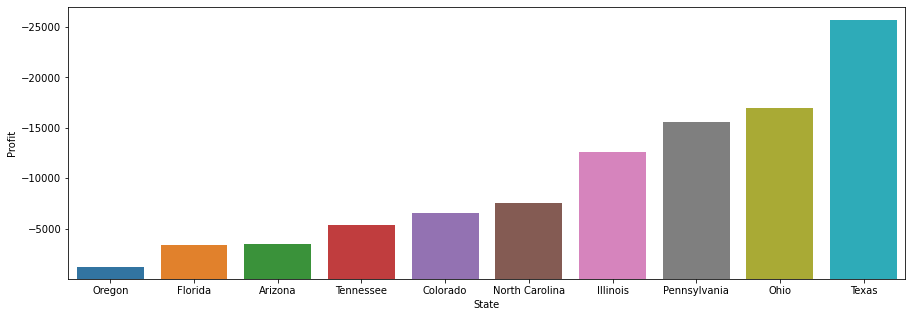

In [61]:
plt.figure(figsize=(15,5))
sns.barplot(data=last10_states,x='State',y='Profit')
plt.ylim(-10,-27000)
plt.show()

## States which are running in loss ^

In [78]:
top_cities=df.groupby(['State','City']).sum().reset_index().sort_values('Profit',ascending=False)


In [76]:
top10_cities=top_cities[:10]


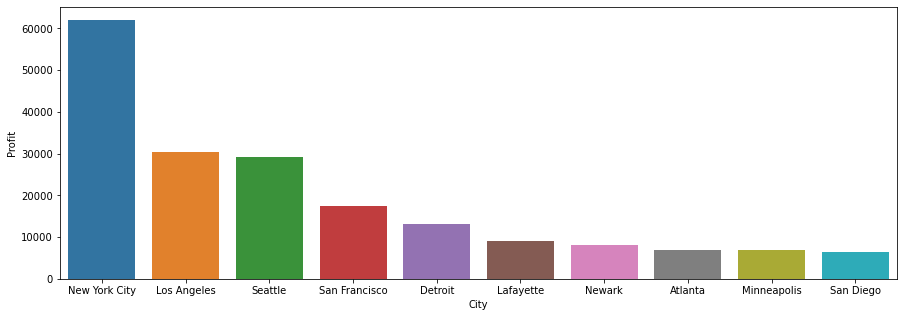

In [85]:
plt.figure(figsize=[15,5])
sns.barplot(data=top10_cities,x=('City'),y="Profit")
plt.show()


## Top 10 profitable cities ^

In [91]:
region=df.groupby('Region').sum().reset_index()

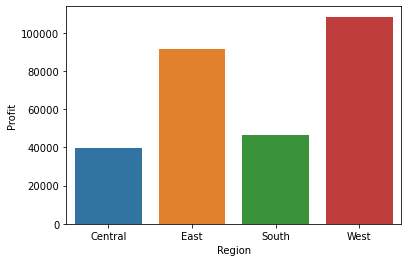

In [93]:
sns.barplot(data=region,x='Region',y='Profit')
plt.show()

## Region wise profits ^

In [106]:
cat_sub=df.groupby(['Category','Sub-Category']).sum().reset_index().sort_values('Profit',ascending=False)
cat=df.groupby('Category').sum().reset_index().sort_values('Profit',ascending=False)

In [109]:
cat_sub_top=cat_sub[:10]
cat_top=cat[:10]

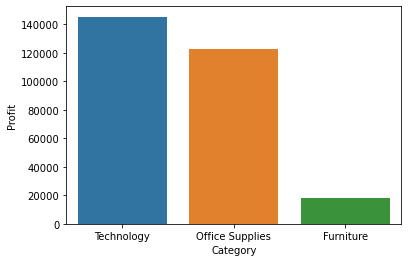

In [111]:
sns.barplot(data=cat_top,x='Category',y="Profit")
plt.show()

## Category wise profit ^

<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

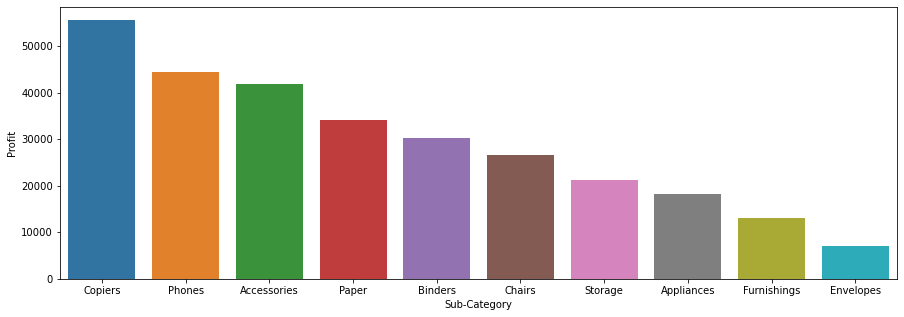

In [117]:
plt.figure(figsize=[15,5])
sns.barplot(data=cat_sub_top,x='Sub-Category',y='Profit')

## Sub category wise profit ^

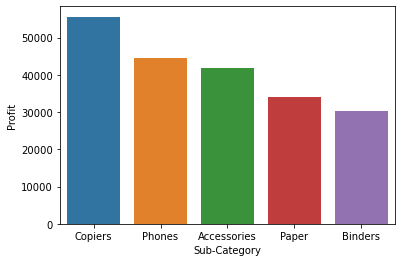

In [182]:
profitable_products=df.groupby(['Category','Sub-Category']).sum().reset_index().sort_values('Profit',ascending=False)
profitable_products_top=profitable_products[:5]
profitable_products_top=profitable_products_top.loc[:,['Category','Sub-Category','Profit']]
profitable_products_top

sns.barplot(data=profitable_products_top,x='Sub-Category',y='Profit')
plt.show()

## Top 5 profitable products ^

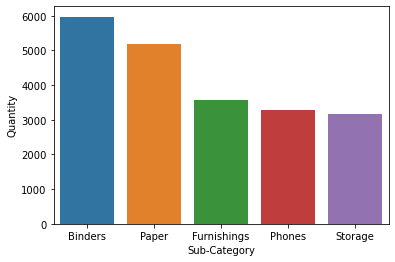

In [184]:
top_sell=df.groupby(['Category','Sub-Category']).sum().reset_index().sort_values('Quantity',ascending=False).loc[:,['Category','Sub-Category','Quantity']]
top_sell=top_sell.reset_index()
top_sell.drop(columns='index',inplace=True)
top_sell=top_sell[:5]
sns.barplot(data=top_sell,x='Sub-Category',y='Quantity')
plt.show()

## Top 5 selling products ^

In [163]:
corr=df.corr()

<AxesSubplot:>

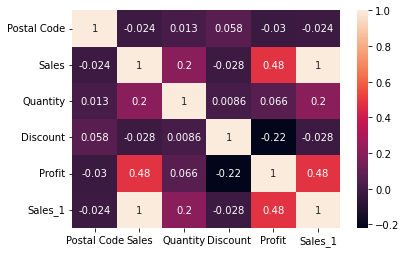

In [165]:
sns.heatmap(corr,annot=True)

## correlation between sales and profit is 0.48 ^

In [175]:
low_sell=df.groupby(['Category','Sub-Category']).sum().reset_index().sort_values(by='Profit')
low_sell_cat=low_sell.loc[:,['Category','Sub-Category','Profit']]

(1000.0, -16000.0)

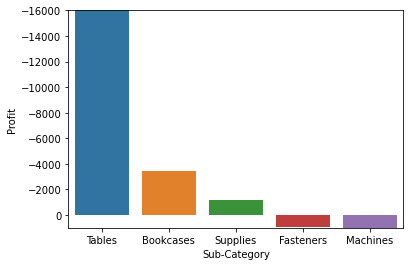

In [193]:
low_sell_cat=low_sell_cat[:5]
sns.barplot(data=low_sell_cat,x='Sub-Category',y='Profit')
plt.ylim(1000,-16000)

## Lowest 5 profitable products ^

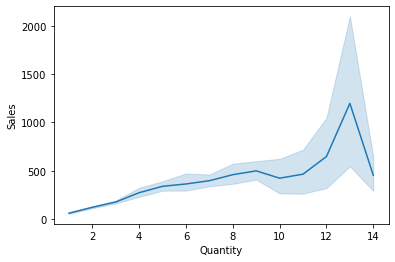

In [198]:
sns.lineplot(data=df,x='Quantity',y='Sales')
plt.show()

## correlation between quantity and sales is 0.2 ^

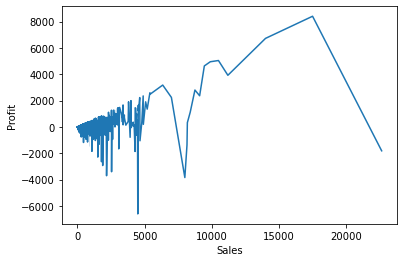

In [200]:
sns.lineplot(data=df,x='Sales',y='Profit')
plt.show()

In [205]:
ship_mode=df['Ship Mode'].value_counts().reset_index()
ship_mode.columns=['Ship_mode','Counts']

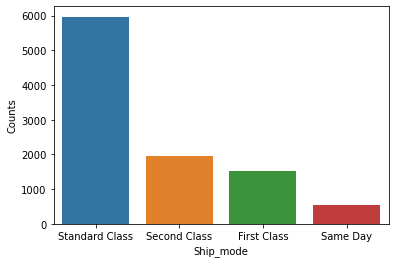

In [208]:
sns.barplot(data=ship_mode,x='Ship_mode',y='Counts')
plt.show()

## Most of ship mode is standard class ^

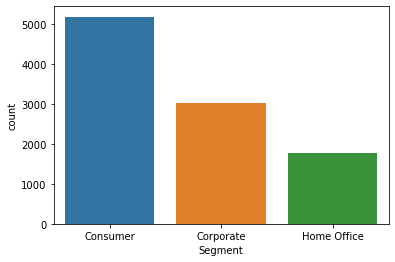

In [210]:
sns.countplot(data=df,x='Segment')
plt.show()